## 1. Basic of  Linear Regression
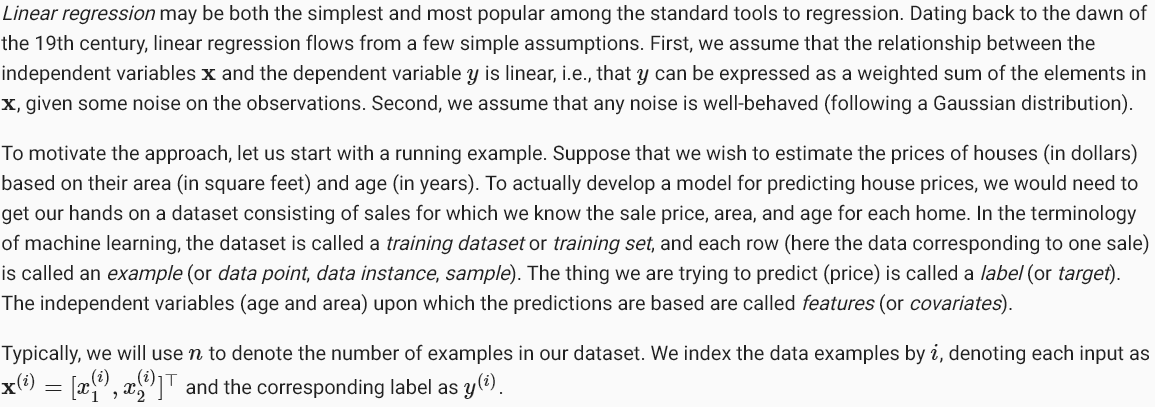

## 2. Linear Model
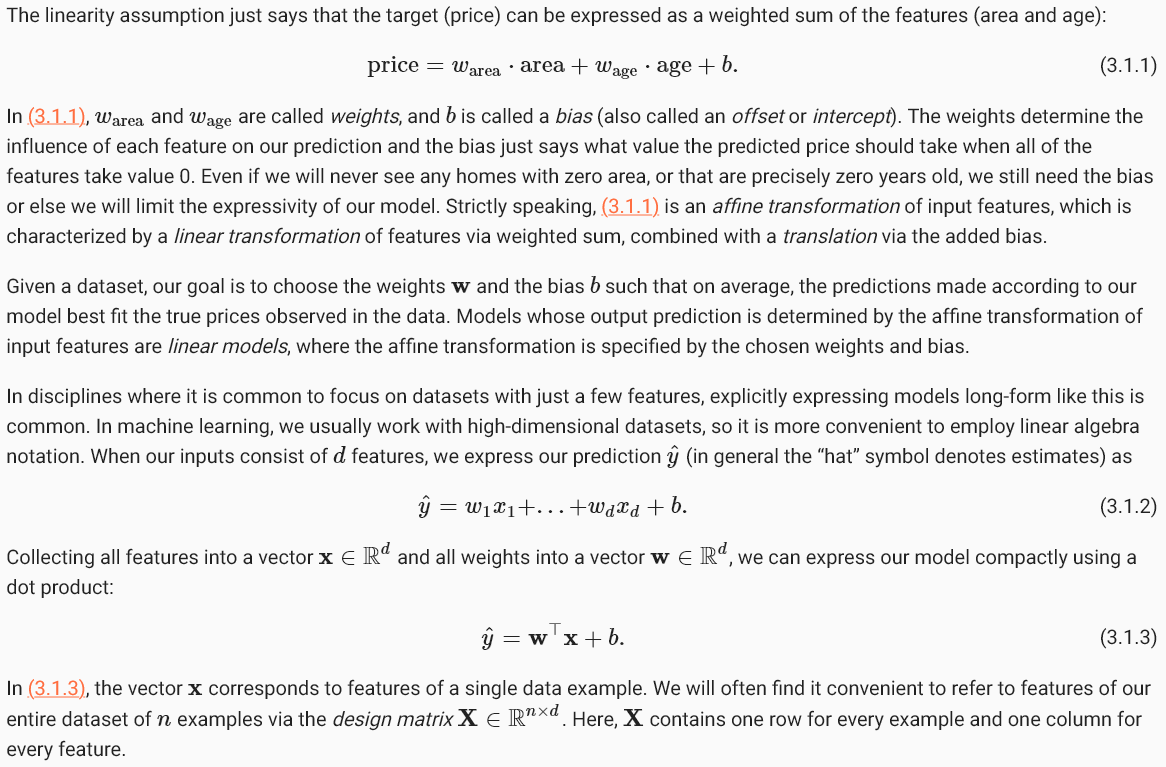

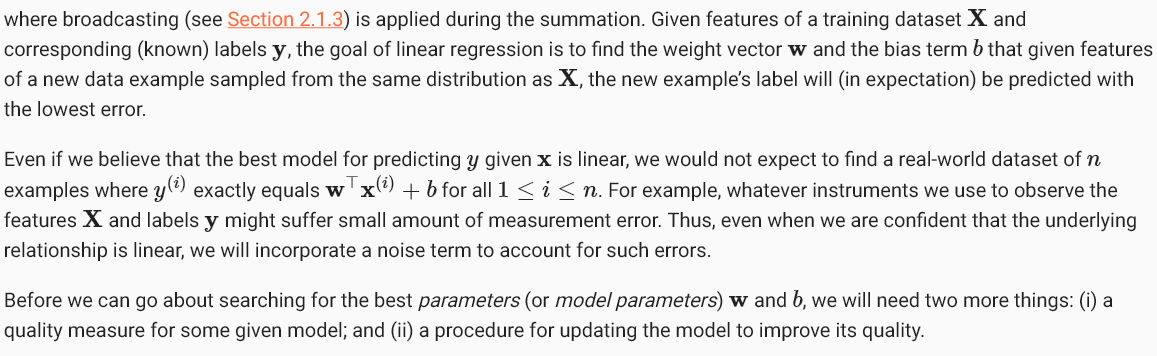

## 3. Loss Function
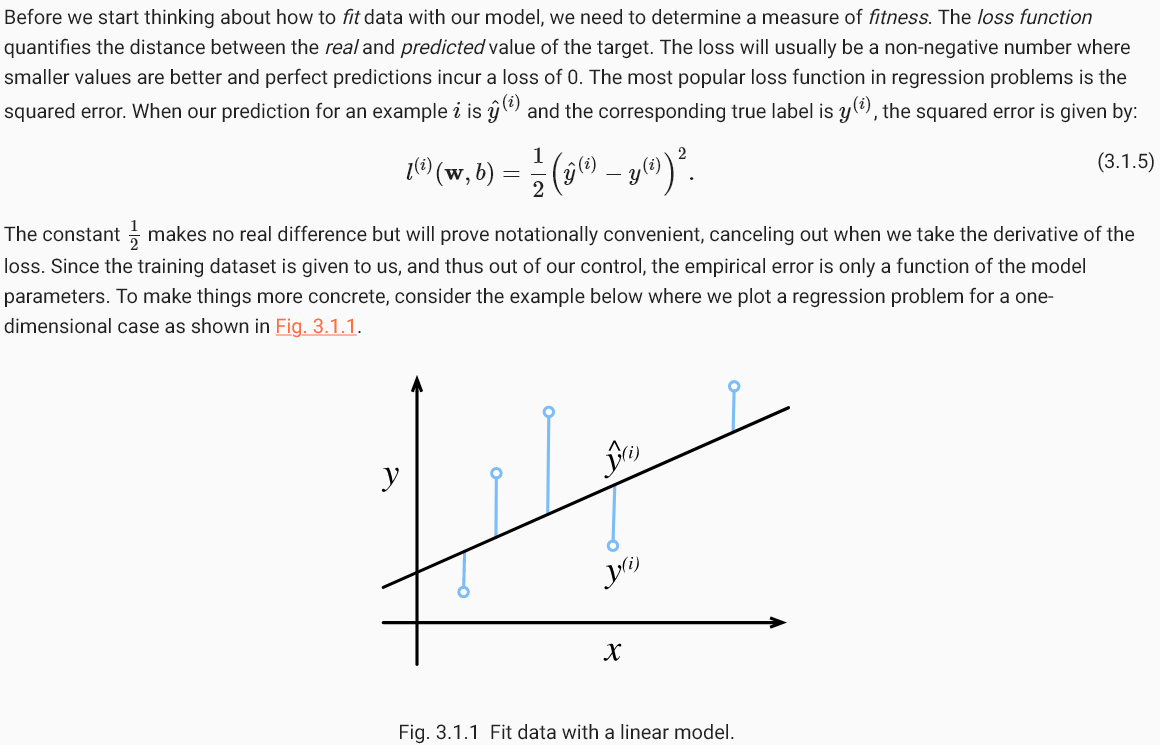
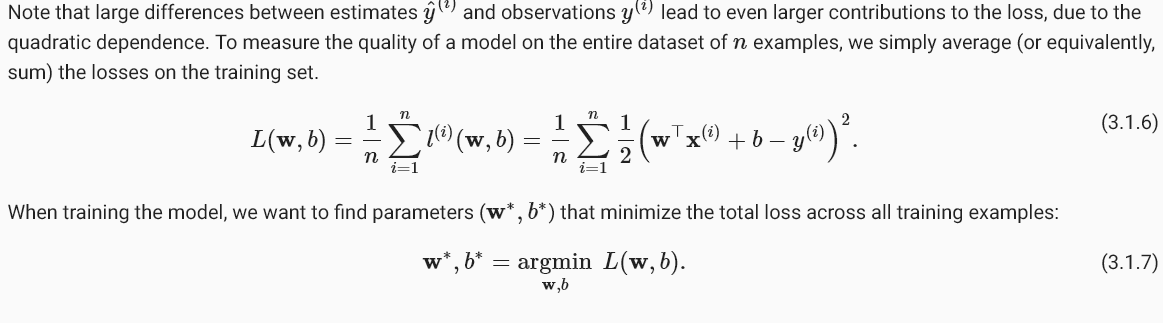

## 4. Analytic Solution
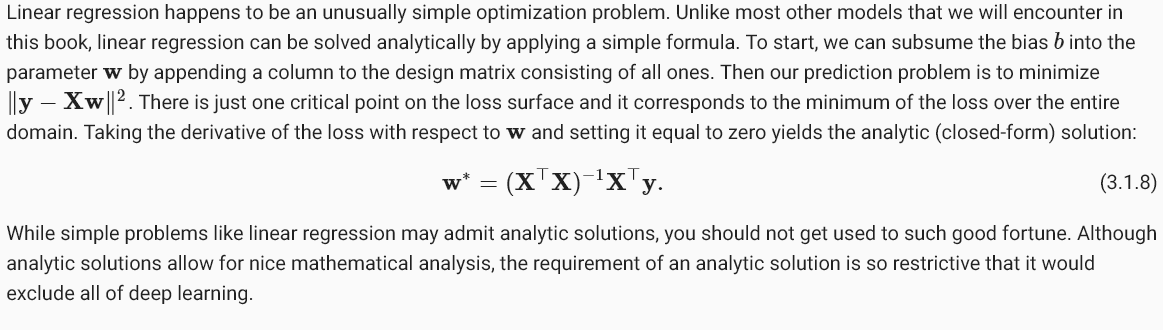

## 5. Minibatch Stochastic Gradient Descent
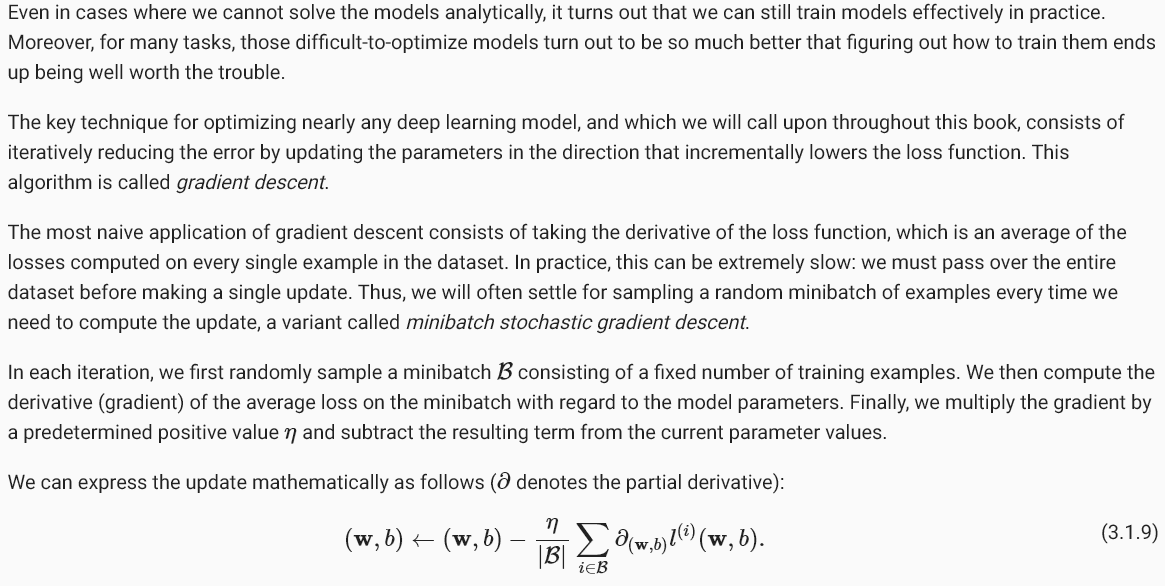

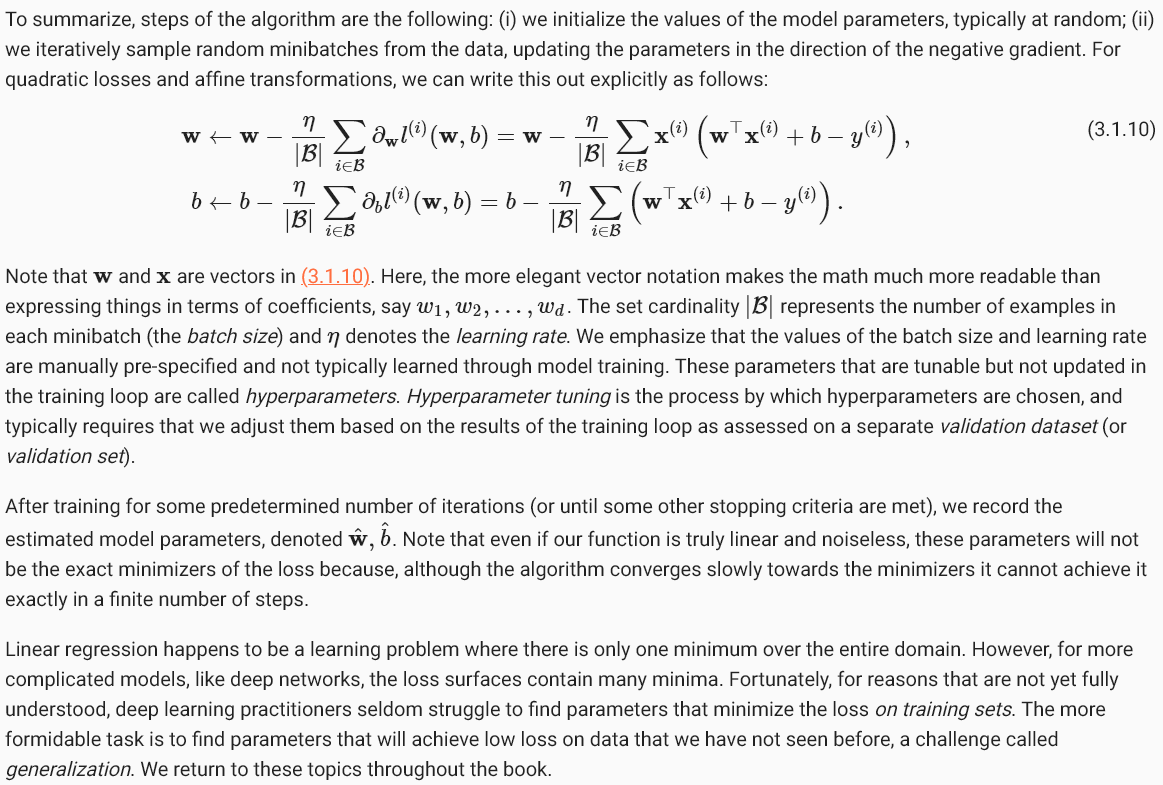

### Make Predictions with the Learned Model
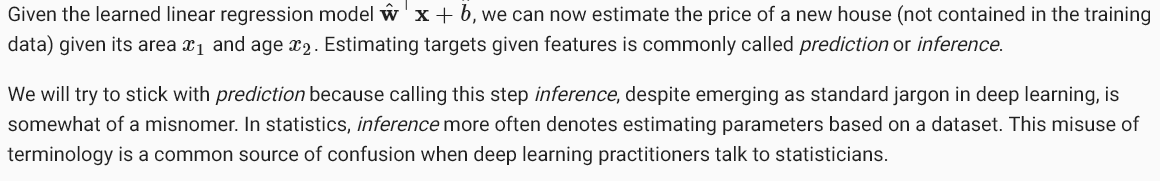

## 6. Vectorization for Speed
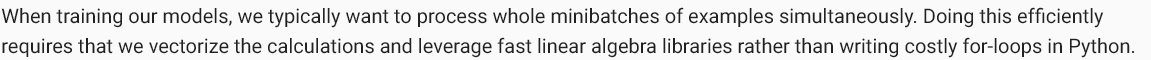


In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

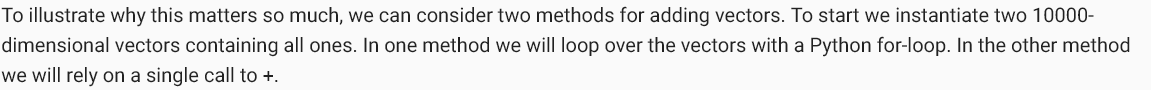

In [2]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [3]:
# To benchmark the running time, define the Timer class
class Timer:
    ''' Record Multiple running times '''
    def __init__(self):
        self.times = []
        self.start()
    
    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

In [6]:
# Benchmark the workloads
c = torch.zeros(n)
timer = Timer()

for i in range(n):
    c[i] = a[i] + b[i]
    
f'{timer.stop():.5f} sec'

'0.18400 sec'

In [9]:
# Alternatively, we rely on the reloaded + operator to compute the elementwise sum.
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00100 sec'

## 7. The Normal Distribution and Squared Loss
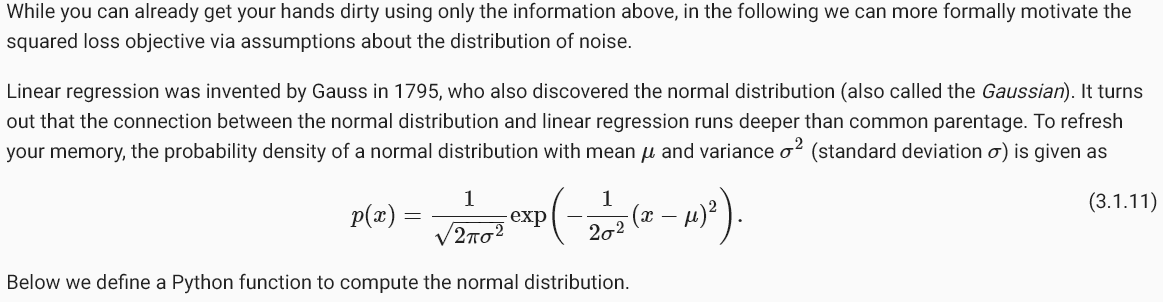

In [12]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma ** 2)
    return p * np.exp(-0.5 / sigma ** 2 * (x - mu) ** 2)

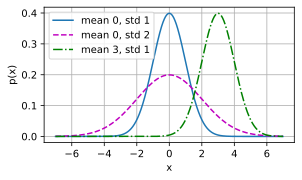

In [13]:
# Visualize the Norms

x = np.arange(-7, 7, 0.01)

# Mean and std pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

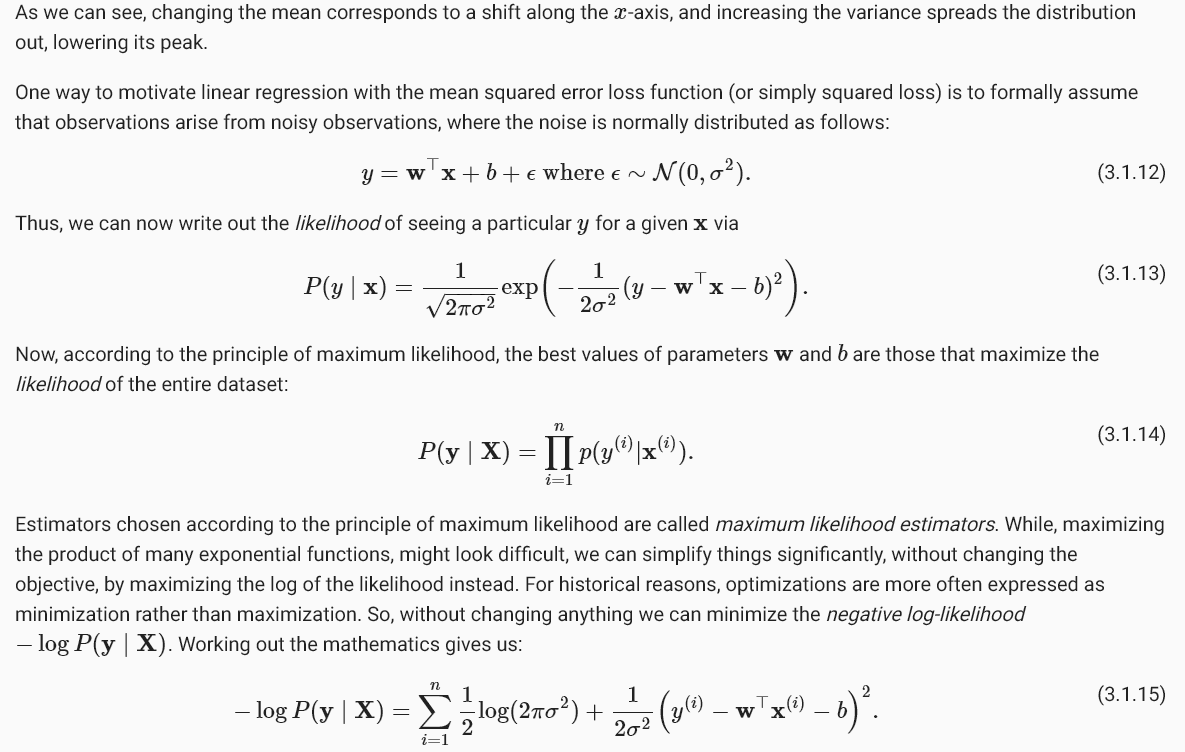

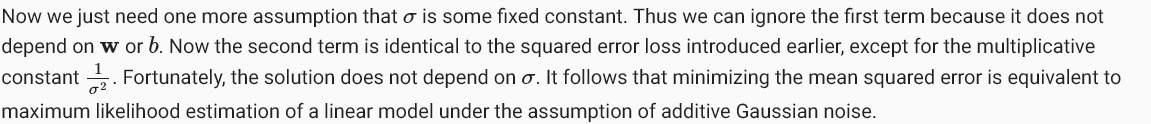

## 8. From Linear Regression to Deep Networks

###  Neural Network Diagram

<img src="http://www.d2l.ai/_images/singleneuron.svg"/>

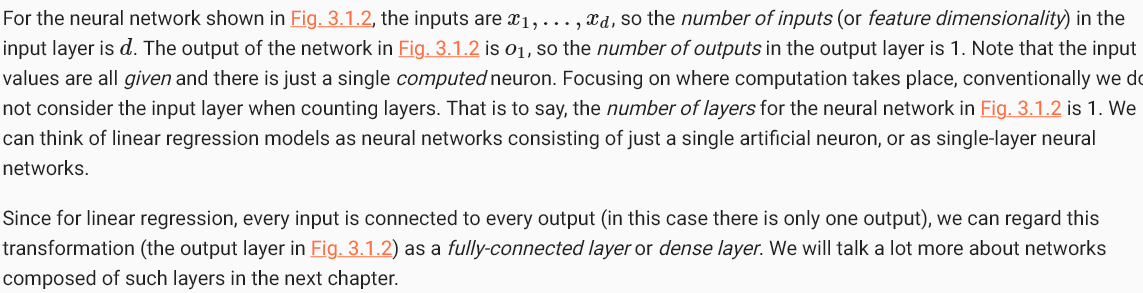